# STEAM DATA ANALYSIS

In [83]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Connect to Database and pull data into the dataframe

In [84]:
conn = sqlite3.connect("SteamDB.sqlite")
cur = conn.cursor()

In [85]:
sqlQuery = """SELECT name, popularTags, price, features, lanInterface, LanAudio, lanSubtitle, lanAllSupported, genre, developer, publisher, releaseDate, minSysReq, recSysReq, reviewTotal, reviewPositive, reviewNegative, reviewPercentage 
from GameDetails 
JOIN Games ON GameDetails.gameId=Games.id 
order by GameDetails.gameId"""

In [86]:
df = pd.read_sql_query(sqlQuery, conn, index_col="name", parse_dates="releaseDate")
conn.close()

## Data Summary

In [87]:
df.head()

,popularTags,price,features,lanInterface,LanAudio,lanSubtitle,lanAllSupported,genre,developer,publisher,releaseDate,minSysReq,recSysReq,reviewTotal,reviewPositive,reviewNegative,reviewPercentage
name,,,,,,,,,,,,,,,,,
Counter-Strike: Global Offensive,"FPS,Shooter,Multiplayer,Competitive,Action,Tea...","274,95 TL","Steam Achievements,Full controller support,Ste...","English,Czech,Danish,Dutch,Finnish,French,Germ...",English,,28,"Action,Free to Play","Valve,Hidden Path Entertainment",Valve,2012-08-21,,,7327687,6502966,824721,88
ELDEN RING,"Souls-like,Dark Fantasy,RPG,Open World,Difficu...","699,00 TL","Single-player,Online PvP,Online Co-op,Steam Ac...","English,French,Italian,German,Spanish - Spain,...",English,"English,French,Italian,German,Spanish - Spain,...",14,"Action,RPG",FromSoftware Inc.,"FromSoftware Inc.,Bandai Namco Entertainment",2022-02-24,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating syst...,683586,628828,54758,91
Red Dead Redemption 2,"Open World,Story Rich,Western,Adventure,Action...","1.150,00 TL","Single-player,Online PvP,Online Co-op,Steam Ac...","English,French,Italian,German,Spanish - Spain,...",English,"English,French,Italian,German,Spanish - Spain,...",13,"Action,Adventure",Rockstar Games,Rockstar Games,2019-12-05,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating syst...,420421,379969,40452,90
Forza Horizon 5,"Racing,Open World,Driving,Multiplayer,Automobi...","599,00 TL","Single-player,Online PvP,Online Co-op,Cross-Pl...","English,French,Italian,German,Spanish - Spain,...","English,French,German,Portuguese - Brazil,Span...","English,Italian,Spanish - Spain,Czech,Hungaria...",16,"Action,Adventure,Racing,Simulation,Sports",Playground Games,Xbox Game Studios,2021-11-08,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating syst...,124996,110002,14994,88
Rust,"Survival,Crafting,Multiplayer,Open World,Open ...","308,00 TL","MMO,Online PvP,Online Co-op,Cross-Platform Mul...","English,French,Italian,German,Spanish - Spain,...","English,French,Italian,German,Spanish - Spain,...","English,French,Italian,German,Spanish - Spain,...",25,"Action,Adventure,Indie,Massively Multiplayer,RPG",Facepunch Studios,Facepunch Studios,2018-02-08,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating syst...,938300,816121,122179,86


## Log Count

In [88]:
df.shape

(26457, 17)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26457 entries, Counter-Strike: Global Offensive to DEKONSTRUKT
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   popularTags       26457 non-null  object        
 1   price             26435 non-null  object        
 2   features          26457 non-null  object        
 3   lanInterface      26457 non-null  object        
 4   LanAudio          26457 non-null  object        
 5   lanSubtitle       26457 non-null  object        
 6   lanAllSupported   26457 non-null  int64         
 7   genre             26457 non-null  object        
 8   developer         26457 non-null  object        
 9   publisher         26457 non-null  object        
 10  releaseDate       26428 non-null  datetime64[ns]
 11  minSysReq         26457 non-null  object        
 12  recSysReq         26457 non-null  object        
 13  reviewTotal       26457 non-null  int64     

In [90]:
df.isnull().values.any()

True

In [91]:
df.isnull().sum()

popularTags          0
price               22
features             0
lanInterface         0
LanAudio             0
lanSubtitle          0
lanAllSupported      0
genre                0
developer            0
publisher            0
releaseDate         29
minSysReq            0
recSysReq            0
reviewTotal          0
reviewPositive       0
reviewNegative       0
reviewPercentage     0
dtype: int64

## Data Cleaning

In [92]:
df.dropna(subset=["price","releaseDate"], inplace=True)
#df = df[df["reviewTotal"] > 100]
df.isnull().values.any()

False

## Analysis of Language support

### Most Popular Languages

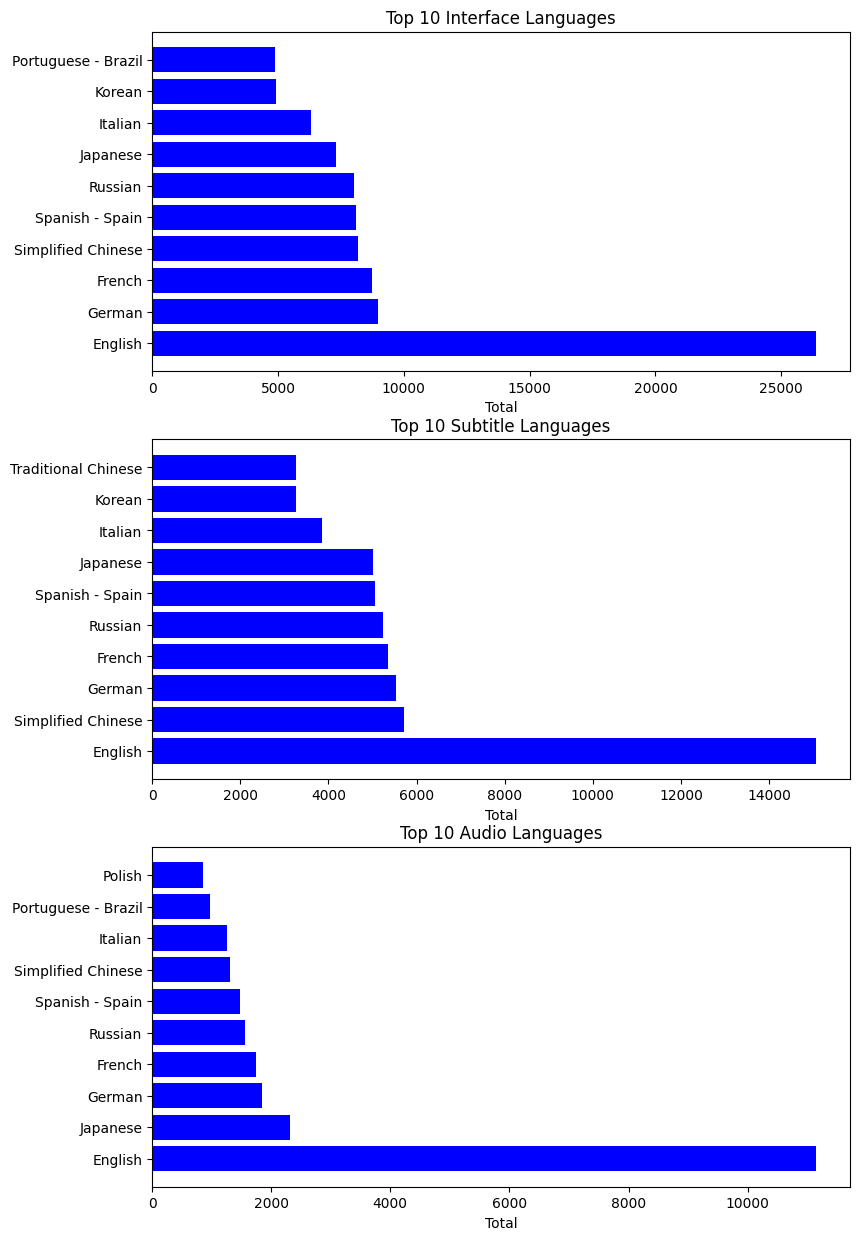

In [130]:

def lanSep(column):
    lanArr = []
    def adFe(x):
        for i in x:
            lanArr.append(i)
    
    dfLan = df[column].str.split(",")
    dfLan.apply(adFe)

    dfLan = pd.DataFrame(data=pd.Series(lanArr), columns=[column])
    dfLan = dfLan[dfLan[column] != ""]
    dfLan.reset_index(drop=True, inplace=True)
    return dfLan[column].value_counts().head(10)

dfInter = lanSep("lanInterface")
dfSub = lanSep("lanSubtitle")
dfAud = lanSep("LanAudio")

fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize=(9, 15))

axes[0].barh(dfInter.index, dfInter.values, color='Blue')
axes[0].set_xlabel("Total")
axes[0].set_title("Top 10 Interface Languages")

axes[1].barh(dfSub.index, dfSub.values, color='Blue')
axes[1].set_xlabel("Total")
axes[1].set_title("Top 10 Subtitle Languages")

axes[2].barh(dfAud.index, dfAud.values, color='Blue')
axes[2].set_xlabel("Total")
axes[2].set_title("Top 10 Audio Languages")

plt.show()

### English Supporting Games

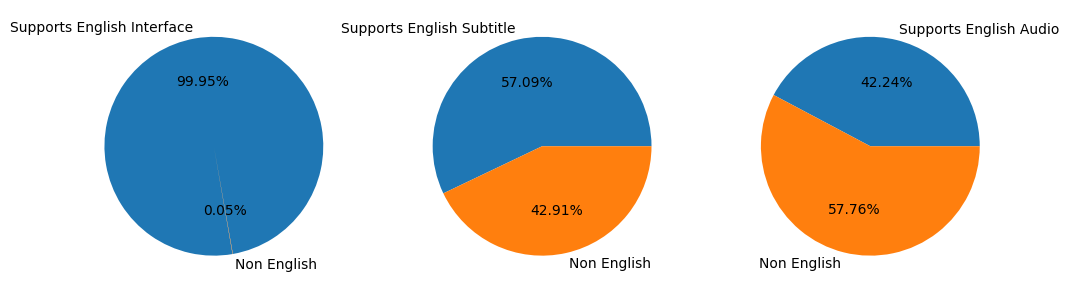

In [93]:
enInSupNum = df.loc[df["lanInterface"].str.contains("English", case=False, na=False), "lanInterface"].count()
enSubSupNum = df.loc[df["lanSubtitle"].str.contains("English", case=False, na=False), "lanSubtitle"].count()
enAudSupNum = df.loc[df["LanAudio"].str.contains("English", case=False, na=False), "LanAudio"].count()
totalNum = len(df)

# Create 3 column figure
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

# First plot -------------------

enLabels = ["Supports English Interface", "Non English"]
xy = np.array([enInSupNum, totalNum-enInSupNum])
axes[0].pie(xy, labels = enLabels, startangle=-80, autopct='%1.2f%%')

# Second plot ---------------------
enLabels = ["Supports English Subtitle", "Non English"]
xy = np.array([enSubSupNum, totalNum-enSubSupNum])
axes[1].pie(xy, labels = enLabels, autopct='%1.2f%%')

# Third plot --------------------------
enLabels = ["Supports English Audio", "Non English"]
xy = np.array([enAudSupNum, totalNum-enAudSupNum])
axes[2].pie(xy, labels = enLabels, autopct='%1.2f%%')

# Show the graphic
plt.show()

## Total review of English supported games and not supported

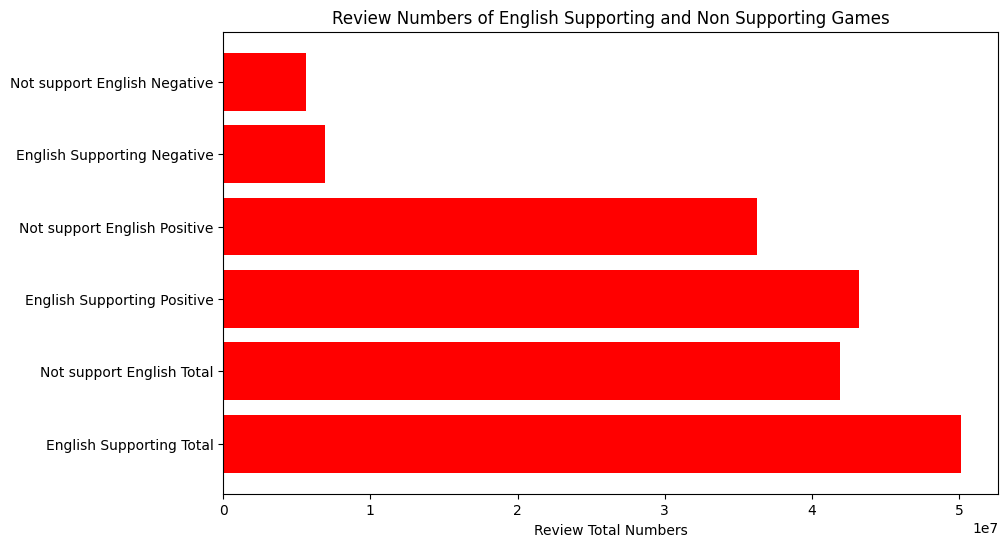

In [95]:
df_eng = df[df["reviewTotal"] > 100]
enSupRevTotal = df_eng.loc[df_eng["lanSubtitle"].str.contains("English"), "reviewTotal"].sum()
enSupPosTotal = df_eng.loc[df_eng["lanSubtitle"].str.contains("English"), "reviewPositive"].sum()
enSupNegTotal = df_eng.loc[df_eng["lanSubtitle"].str.contains("English"), "reviewNegative"].sum()

nenSupRevTotal = df_eng.loc[~df_eng["lanSubtitle"].str.contains("English"), "reviewTotal"].sum()
nenSupPosTotal = df_eng.loc[~df_eng["lanSubtitle"].str.contains("English"), "reviewPositive"].sum()
nenSupNegTotal = df_eng.loc[~df_eng["lanSubtitle"].str.contains("English"), "reviewNegative"].sum()

enSupport = ["English Supporting Total", "Not support English Total","English Supporting Positive", "Not support English Positive", "English Supporting Negative", "Not support English Negative"]
enSupportValues = [enSupRevTotal, nenSupRevTotal, enSupPosTotal, nenSupPosTotal, enSupNegTotal, nenSupNegTotal]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.barh(enSupport, enSupportValues, color='Red')
ax.set_xlabel("Review Total Numbers")
ax.set_title("Review Numbers of English Supporting and Non Supporting Games")
plt.show()

### Supported Language Number and positive review percentage correlation 

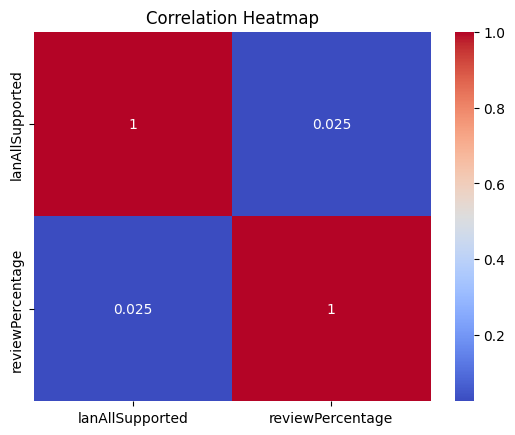

In [94]:
corrMatrix =  df[["lanAllSupported", "reviewPercentage"]].corr()
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Features

In [96]:
feature_counts = df.loc[df["reviewTotal"] > 100, "features"].value_counts()
feature_counts_df = pd.DataFrame({'Features': feature_counts.index, 'Count': feature_counts.values})
feature_counts_df = feature_counts_df.sort_values(by='Count', ascending=False)
feature_counts_df['Count'] = feature_counts_df['Count'].astype(int)
feature_counts_df.loc[feature_counts_df["Count"] > 10].head(10)

,Features,Count
0,"Single-player,",1011
1,"Single-player,Steam Achievements,Steam Trading...",506
2,"Single-player,Steam Achievements,",490
3,"Single-player,Steam Achievements,Steam Trading...",460
4,"Single-player,Steam Achievements,Full controll...",424
5,"Single-player,Steam Achievements,Full controll...",420
6,"Single-player,Steam Achievements,Steam Cloud,",386
7,"Single-player,Steam Cloud,",281
8,"Single-player,Steam Trading Cards,",268
9,"Single-player,Steam Achievements,Full controll...",229


### Top 10 Features Combinations

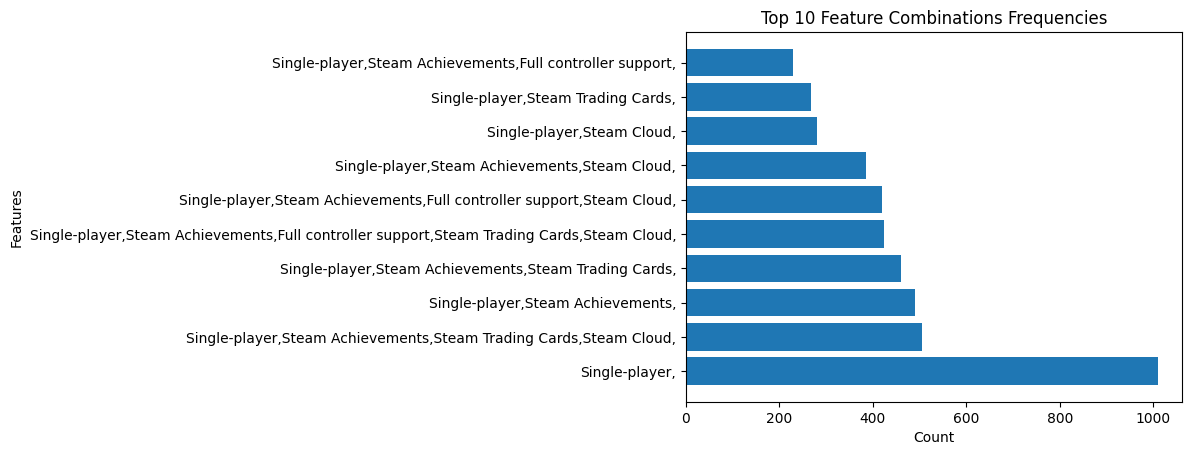

In [97]:
plt.barh(feature_counts_df['Features'].head(10), feature_counts_df['Count'].head(10))

plt.ylabel('Features')
plt.xlabel('Count')
plt.title('Top 10 Feature Combinations Frequencies')

plt.xticks(rotation=0)

plt.show()

### Top 10 Features

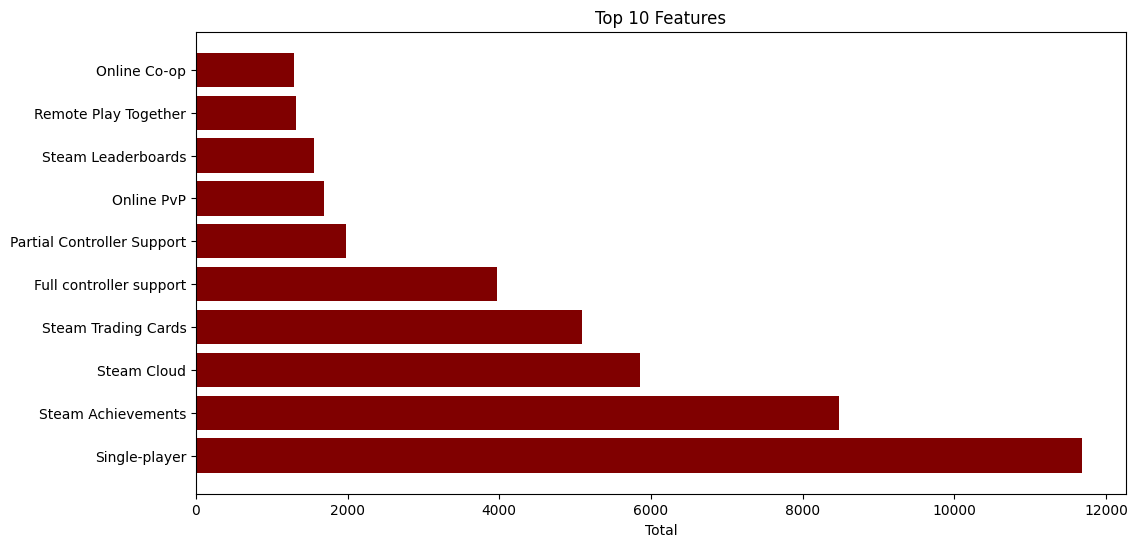

In [98]:
features = []
def adFe(x):
    for i in x:
        features.append(i)
dfFeatures = df.loc[df["reviewTotal"] > 100, "features"].str.split(",")
dfFeatures.apply(adFe)
dfFeatures = pd.DataFrame(data=pd.Series(features), columns=["features"])
dfFeatures = dfFeatures[dfFeatures["features"] != ""]
dfFeatures.reset_index(drop=True, inplace=True)
dfFeatures = dfFeatures["features"].value_counts().head(10)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.barh(dfFeatures.index, dfFeatures.values, color='maroon')
ax.set_xlabel("Total")
ax.set_title("Top 10 Features")

plt.show()

### Compairing Features Combination Count and Single Feature Count

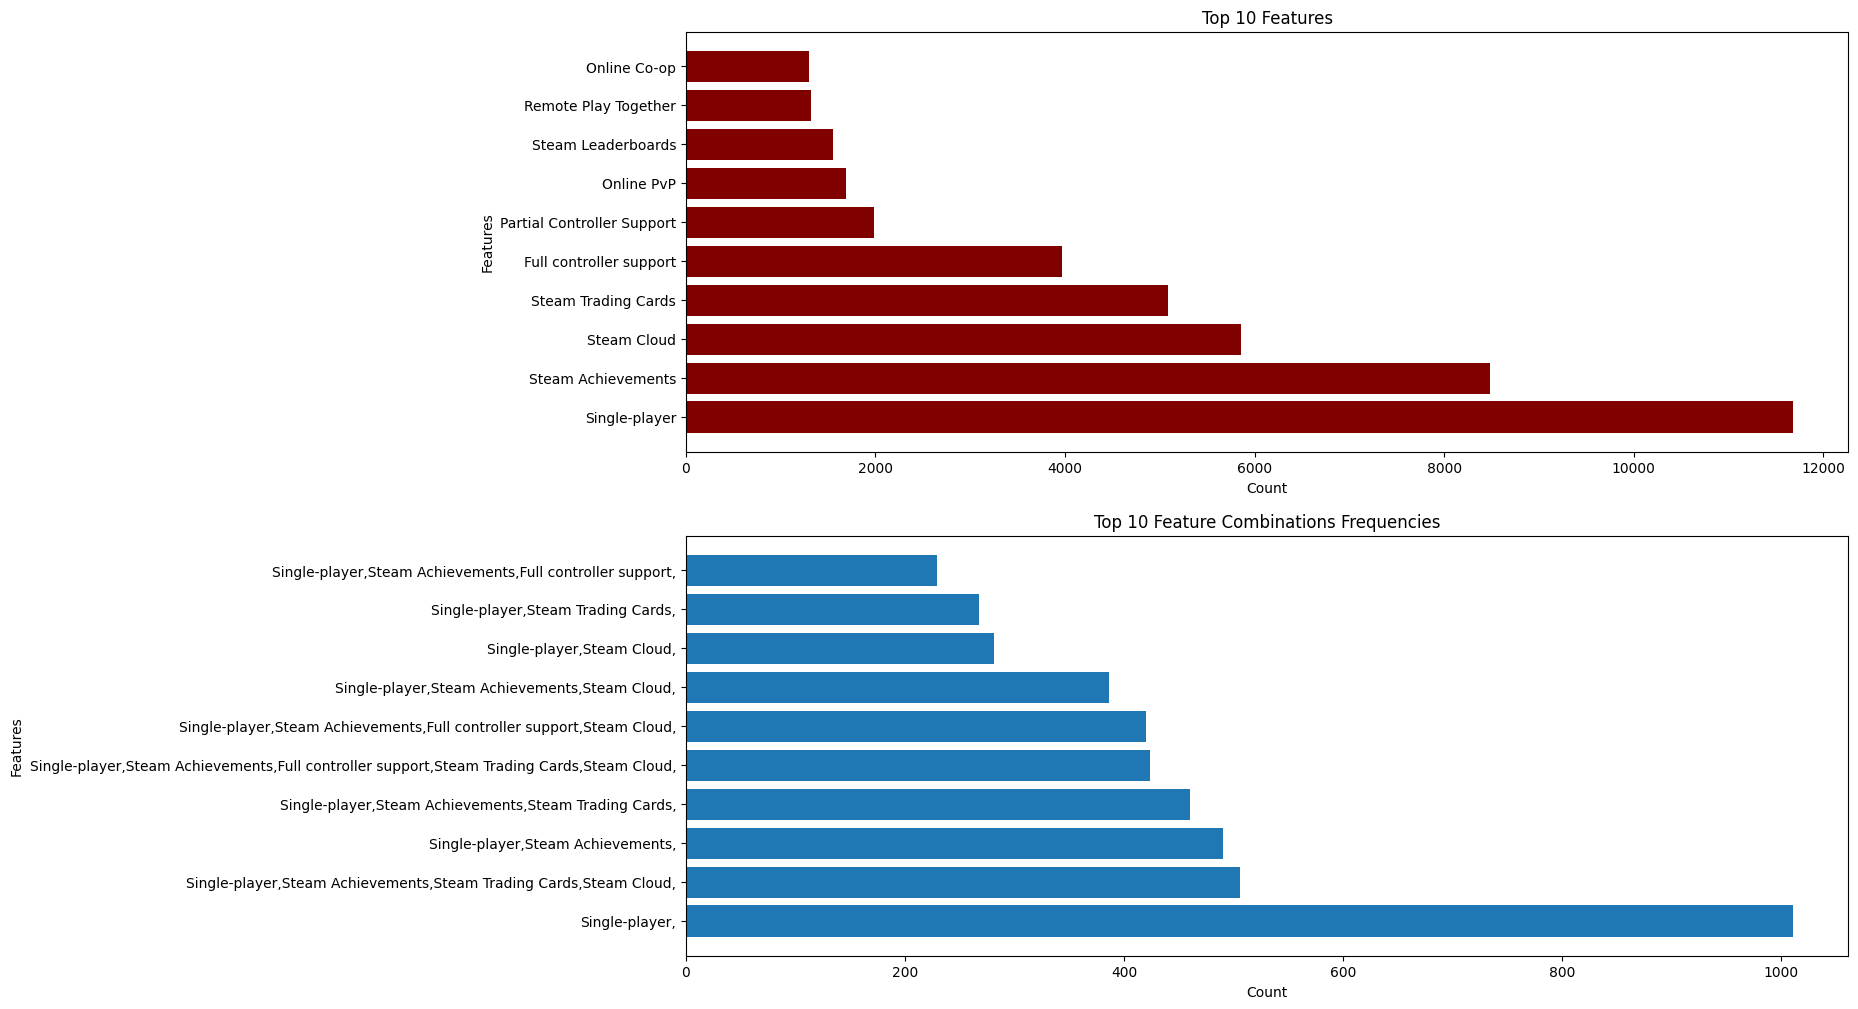

In [99]:
#Create Figure
fig, ax = plt.subplots(nrows=2, ncols=1 ,figsize=(15, 12))

#bar 1
ax[0].barh(dfFeatures.index, dfFeatures.values, color='maroon')
ax[0].set_ylabel('Features')
ax[0].set_xlabel('Count')
ax[0].set_title('Top 10 Features')

#bar 2
ax[1].barh(feature_counts_df['Features'].head(10), feature_counts_df['Count'].head(10))
ax[1].set_ylabel('Features')
ax[1].set_xlabel('Count')
ax[1].set_title('Top 10 Feature Combinations Frequencies')

plt.show()

## Genre Analysis

## Splitting genre column to examine the number and positive review percentage by genre

In [100]:
genreSeries = pd.Series(df["genre"].str.split(","))
genreSeries.reset_index(drop=True, inplace=True)

genres = []

for i in range(len(genreSeries)):
    for j in range(len(genreSeries[i])):
        genre = genreSeries[i][j]
        if genre not in genres and genre != None and genre != "":
            genres.append(genre)


d = {"count":0,"reviewMean":0,"reviewTotal":0}
genreDF = pd.DataFrame(data=d, index=genres)

for index, row in genreDF.iterrows():
    row["count"] = df.loc[df["genre"].str.contains(index), "genre"].count()
    row["reviewMean"] = int(df.loc[df["genre"].str.contains(index), "reviewPercentage"].mean())
    row["reviewTotal"] = df.loc[df["genre"].str.contains(index), "reviewTotal"].sum()

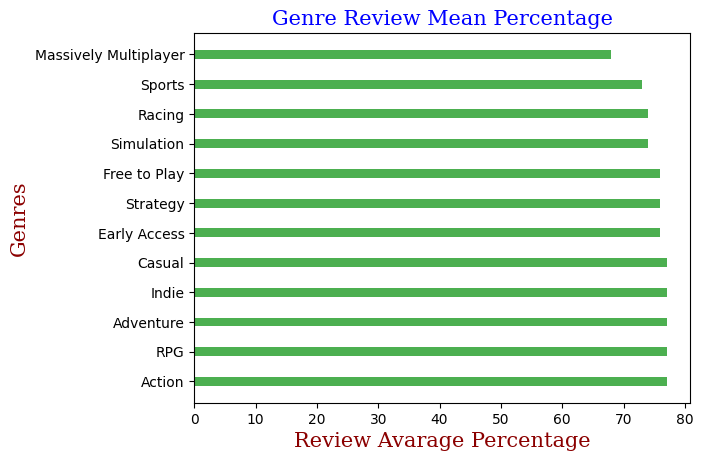

In [101]:
genreDF = genreDF.sort_values(["reviewMean"], ascending=False)
plt.barh(genreDF[genreDF["count"] > 10].index, genreDF.loc[genreDF["count"] > 10, "reviewMean"], color = "#4CAF50", height = 0.3)

font1 = {'family':'serif','color':'blue','size':15}
font2 = {'family':'serif','color':'darkred','size':15}
#font3 = {'family':'serif','color':'green','size':5}

plt.title("Genre Review Mean Percentage", fontdict = font1)
plt.xlabel("Review Avarage Percentage", fontdict = font2)
plt.ylabel("Genres", fontdict = font2)

plt.show()


### Most Reviewed Genres

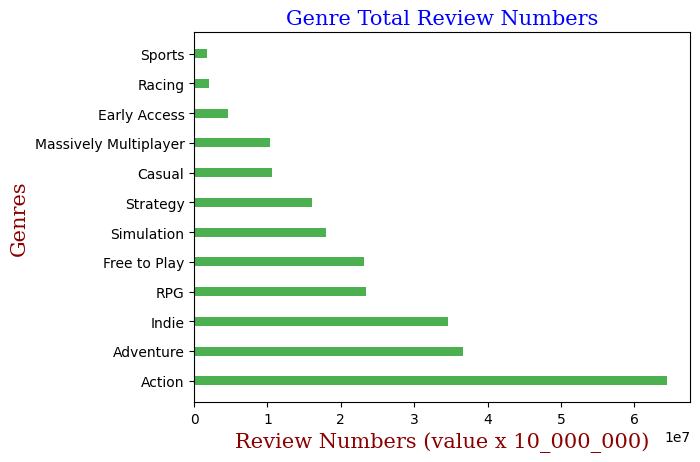

In [102]:
genreDF = genreDF.sort_values(["reviewTotal"], ascending=False)
plt.barh(genreDF[genreDF["reviewTotal"] > 1000].index, genreDF.loc[genreDF["reviewTotal"] > 1000, "reviewTotal"], color = "#4CAF50", height = 0.3)

font1 = {'family':'serif','color':'blue','size':15}
font2 = {'family':'serif','color':'darkred','size':15}
#font3 = {'family':'serif','color':'green','size':5}

plt.title("Genre Total Review Numbers", fontdict = font1)
plt.xlabel("Review Numbers (value x 10_000_000)", fontdict = font2)
plt.ylabel("Genres", fontdict = font2)

plt.show()

### Most Reviewed Genres after 2018

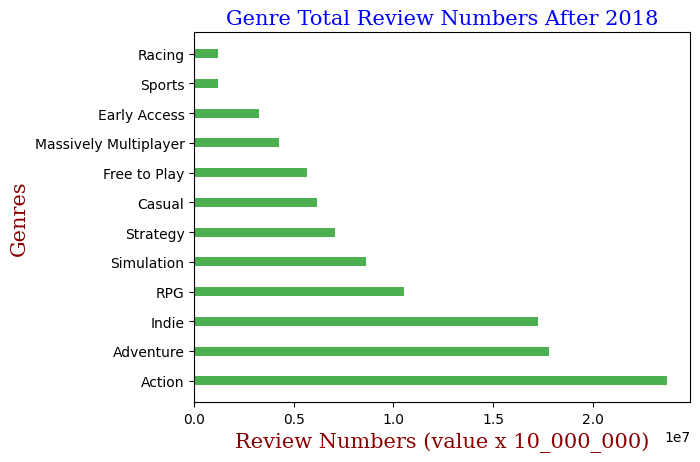

In [103]:
date_before = datetime.datetime(2018, 1, 1)
genDF2K18 = df[df["releaseDate"] >= date_before]

genreSeries = pd.Series(genDF2K18["genre"].str.split(","))
genreSeries.reset_index(drop=True, inplace=True)

genres = []

for i in range(len(genreSeries)):
    for j in range(len(genreSeries[i])):
        genre = genreSeries[i][j]
        if genre not in genres and genre != None and genre != "":
            genres.append(genre)


d = {"count":0,"reviewMean":0,"reviewTotal":0}
genreDF = pd.DataFrame(data=d, index=genres)

for index, row in genreDF.iterrows():
    row["count"] = genDF2K18.loc[genDF2K18["genre"].str.contains(index), "genre"].count()
    row["reviewMean"] = int(genDF2K18.loc[genDF2K18["genre"].str.contains(index), "reviewPercentage"].mean())
    row["reviewTotal"] = genDF2K18.loc[genDF2K18["genre"].str.contains(index), "reviewTotal"].sum()

genreDF = genreDF.sort_values(["reviewTotal"], ascending=False)
plt.barh(genreDF[genreDF["reviewTotal"] > 1000].index, genreDF.loc[genreDF["reviewTotal"] > 1000, "reviewTotal"], color = "#4CAF50", height = 0.3)

font1 = {'family':'serif','color':'blue','size':15}
font2 = {'family':'serif','color':'darkred','size':15}
#font3 = {'family':'serif','color':'green','size':5}

plt.title("Genre Total Review Numbers After 2018", fontdict = font1)
plt.xlabel("Review Numbers (value x 10_000_000)", fontdict = font2)
plt.ylabel("Genres", fontdict = font2)

plt.show()

## Genres and Features

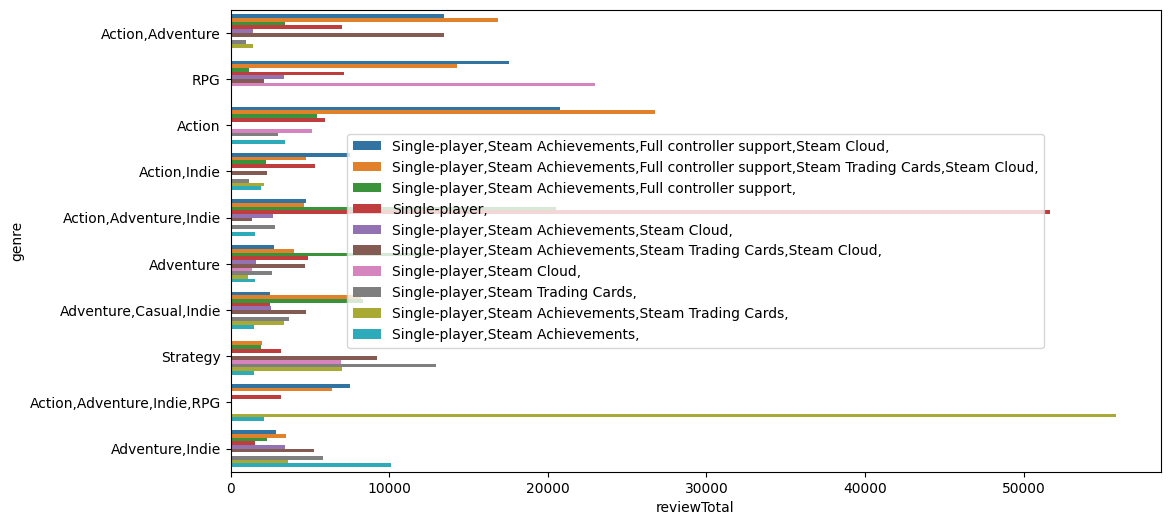

In [104]:
genreCounts = df.loc[df["reviewTotal"] > 1000, "genre"].value_counts()

arrGenre = genreCounts.head(10).index
arrFeature = feature_counts.head(10).index

genreFeatureDF = df.loc[(df["reviewTotal"] > 1000) & (df["features"].isin(arrFeature)) & (df["genre"].isin(arrGenre))]

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()

sns.barplot(x="reviewTotal", y="genre", hue="features", errorbar=None, data=genreFeatureDF, ax=ax)

handles, labels = ax.get_legend_handles_labels()
handles = handles[:10]
labels = labels[:10]

ax.legend(handles, labels, loc="center")

plt.show()


## Analysis of paid and free games

In [105]:
dfFree = df.loc[df["price"].str.contains("Free", case=False) & ~df["price"].str.contains("Demo", case=False) & ~df["price"].str.contains("Trial", case=False)]
dfFree = dfFree[dfFree["reviewTotal"] > 100]
dfFree.describe().T

,count,mean,min,25%,50%,75%,max,std
lanAllSupported,1156.0,6.115917,1.0,1.0,2.0,9.0,103.0,10.318917
releaseDate,1156,2019-06-13 15:47:57.508650496,1996-09-06 00:00:00,2017-09-20 06:00:00,2020-02-07 00:00:00,2021-10-20 06:00:00,2023-07-06 00:00:00,NaN
reviewTotal,1156.0,14002.66263,101.0,240.75,817.5,3749.25,2192724.0,101420.402536
reviewPositive,1156.0,10970.525952,30.0,188.0,643.0,2964.75,1652303.0,75231.892925
reviewNegative,1156.0,3032.136678,1.0,42.0,133.5,611.0,936657.0,31047.517201
reviewPercentage,1156.0,78.782007,19.0,70.75,81.0,89.0,99.0,13.737649


In [106]:
dfPaid = df[df["price"].str.contains("|".join(["TL","Trial","Demo"]), case=False)]
dfPaid = dfPaid[dfPaid["reviewTotal"] > 100]
dfPaid.describe().T

,count,mean,min,25%,50%,75%,max,std
lanAllSupported,11081.0,6.774208,1.0,1.0,5.0,9.0,103.0,9.862196
releaseDate,11081,2017-12-19 16:44:47.410883584,1983-06-19 00:00:00,2016-02-18 00:00:00,2018-10-30 00:00:00,2021-06-01 00:00:00,2023-06-29 00:00:00,NaN
reviewTotal,11081.0,6820.968324,101.0,220.0,541.0,2016.0,7327687.0,79491.727395
reviewPositive,11081.0,6005.857504,16.0,171.0,439.0,1669.0,6502966.0,70820.061466
reviewNegative,11081.0,815.11082,0.0,36.0,91.0,298.0,824721.0,9291.974704
reviewPercentage,11081.0,81.07012,10.0,75.0,84.0,91.0,100.0,13.176011


In [107]:
dfFree["price"].count()

1156

### Total Numbers of Paid and Free Games with more than 100 total reviews

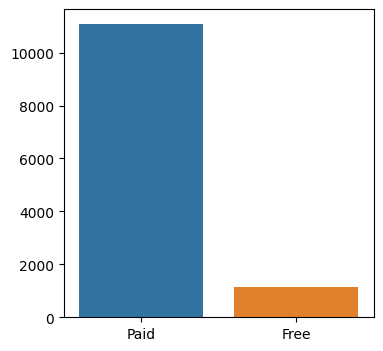

In [108]:
fig, ax = plt.subplots(figsize=(4,4))

sns.barplot(x=["Paid","Free"],y=[dfPaid["price"].count(),dfFree["price"].count()], ax=ax)

plt.show()

### Total Review Numbers of Paid and Free Games with more than 100 total reviews

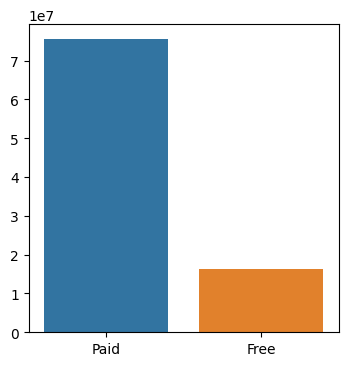

In [111]:
fig, ax = plt.subplots(figsize=(4,4))

sns.barplot(x=["Paid","Free"],y=[dfPaid["reviewTotal"].sum(),dfFree["reviewTotal"].sum()], ax=ax)

plt.show()

### Review Percentage Density of Paid and Free Games

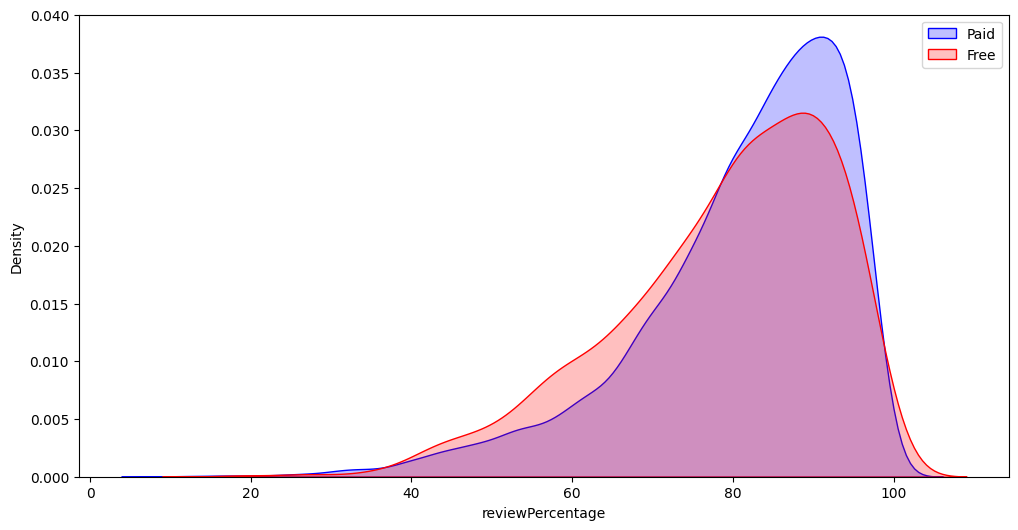

In [110]:
fig, ax = plt.subplots(figsize=(12,6))

sns.kdeplot(dfPaid["reviewPercentage"], fill=True, color="blue", label="Paid", ax=ax)
sns.kdeplot(dfFree["reviewPercentage"], fill=True, color="red", label="Free", ax=ax)

ax.legend()

plt.show()
